In [89]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import random

import cv2
import os
import pandas as pd

In [90]:
def load_images_from_folder(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            # Resize the image to a consistent size
            img = cv2.resize(img, target_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return np.array(images)

# Specify the path to your image folders
train_folder = 'input'
test_folder = 'input_test'

# Load labels from CSV files
train_labels = np.loadtxt('labels.csv', delimiter=',')
test_labels = np.loadtxt('labels_test.csv', delimiter=',')

# Load images from folders
x_train = load_images_from_folder(train_folder)
x_test = load_images_from_folder(test_folder)

# Make sure the number of labels matches the number of images
assert len(train_labels) == len(x_train), "Number of labels and images in the training set do not match"
assert len(test_labels) == len(x_test), "Number of labels and images in the test set do not match"

In [91]:
x_train= x_train.reshape(len(x_train),100,100,3)
y_train= train_labels.reshape(len(train_labels),1)

x_test= x_test.reshape(len(x_test),100,100,3)
y_test= test_labels.reshape(len(test_labels),1)


x_train = x_train/255.0
x_test = x_test/255.0

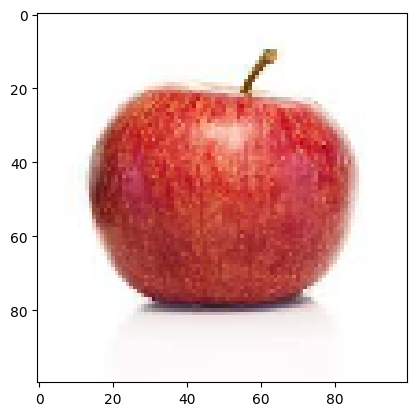

In [92]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [93]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [147]:
model.fit(x_train,y_train, epochs=5, batch_size=64)

Epoch 1/5
1/1 [==============================] - 0s 43ms/step - loss: 3.2051e-04 - accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 48ms/step - loss: 2.9581e-04 - accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 41ms/step - loss: 2.7604e-04 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 49ms/step - loss: 2.5832e-04 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 51ms/step - loss: 2.4007e-04 - accuracy: 1.0000


In [148]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 35ms/step - loss: 3.5019 - accuracy: 0.3000


[3.501945972442627, 0.30000001192092896]

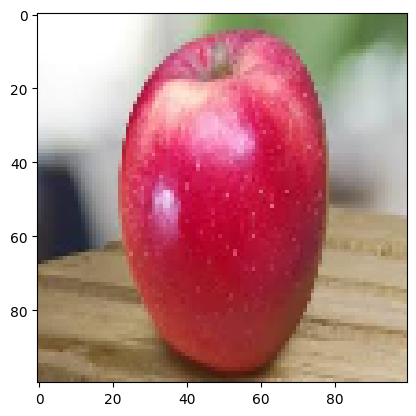

1/1 [==============================] - 0s 30ms/step
[[4.1610514e-07]]
Model says it's an apple


In [266]:
idx2 = random.randint(0, len(x_test) - 1)

plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

threshold = 0.5
prediction = "orange" if y_pred > threshold else "apple"
print("Model says it's an", prediction)